In [26]:
from file_cache import *
root = '/share/data2/body/brain/NPH_PROCESSED'
pd.read_excel(f'{root}/NPH标注汇总表.xlsx')

,iNPH,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,iNPH.1,Unnamed: 6,Unnamed: 7
0,姓名,有无CT,有无MRI,NaN,NaN,姓名,有无CT,有无MRI
1,邴万章,1,1,NaN,NaN,曾汉加,1,1
2,蔡名灿,1,1,NaN,NaN,陈南世,1,1
3,曾爱娣,1,1,NaN,NaN,陈群友,1,1
4,曾松岩,1,1,NaN,NaN,戴云艳,1,1
...,...,...,...,...,...,...,...,...
60,徐梅芳,1,0,NaN,NaN,NaN,NaN,NaN
61,张伟明,1,0,NaN,NaN,NaN,NaN,NaN
62,钟小英,1,0,NaN,NaN,NaN,NaN,NaN
63,钟友和,1,0,NaN,NaN,NaN,NaN,NaN


/share/data2/body/brain/NPH_PROCESSED/iNPH_MRI_PROCESSED/MRMR00045204-Cheng YiGui/4/MRMR00045204-Cheng YiGui_3.DCM
(512, 512)


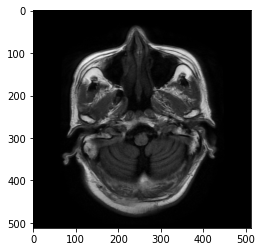

In [128]:
from file_cache import *

patient_id ='MR1312060094-Du RuTan'
slice_sn =10
file = glob(f'{root}/iNPH_MRI_PROCESSED/{patient_id}/2/*_{slice_sn}.DCM')[0]
file = glob('/share/data2/body/brain/NPH_PROCESSED/iNPH_MRI_PROCESSED/MRMR00045204-Cheng YiGui/4/*')[6]
print(file)
# file = '/share/data2/COVID_CMIH_2020/dataCT/scans_dicom/RenminCOVID/RM-P1-100/scans/3-unknown/resources/DICOM/files/Anony_100.0.dcm'
# file = '/share/data2/COVID_CMIH_2020/dataCT/scans_dicom/TonjiCOVID/TJ-P1-44/scans/4-unknown/resources/DICOM/files/Anony_I1410'
# file = '/share/data2/COVID_CMIH_2020/dataCT/scans_dicom/Test_Macau/183.62.9.99/share/CP/0/3132/0028.dcm'
ds = pydicom.dcmread(file, force=True)
if 'TransferSyntaxUID' not in dir(ds.file_meta):
    ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
if 'PlanarConfiguration' not in dir(ds.file_meta):
    ds.file_meta.PlanarConfiguration = 0
img = ds.pixel_array
a = ds
print(img.shape)
plt.imshow(img, cmap='gray')
#ds  


In [133]:
a = np.random.rand(5, 10,10)
cv2.resize(a, (20, 20)).shape

(20, 20, 10)

In [165]:
def one_hot(a, num_classes):
    print(np.unique(a), a.shape)
    a = a.astype(int)
    tmp = np.eye(num_classes)[a.reshape(-1)]
    return np.squeeze(tmp)

img=np.array([0,3,4])

a = one_hot(img, 5)
#a.resize(256, 256, 17, 5)
a

[0 3 4] (3,)


array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [157]:
np.unique(img), img.dtype

(array([0., 1., 2., 3., 4.]), dtype('float64'))

/share/data2/body/brain/NPH_PROCESSED/iNPH_MRI_PROCESSED/MR1312060094-Du RuTan/Durutan-Processed.nii.gz
(256, 256, 17) 10


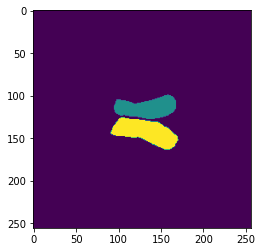

/share/data2/body/brain/NPH_PROCESSED/iNPH_MRI_PROCESSED/MR1312060094-Du RuTan/Durutan-Processed.nii.gz
(256, 256, 17) 11


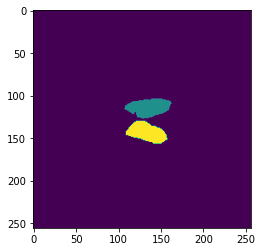

/share/data2/body/brain/NPH_PROCESSED/iNPH_MRI_PROCESSED/MR1312060094-Du RuTan/Durutan-Processed.nii.gz
(256, 256, 17) 12


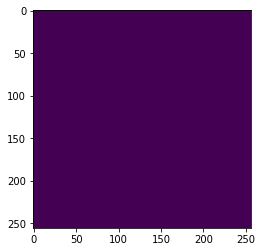

In [148]:
from file_cache import *
for i in range(slice_sn,slice_sn+3):
    file = glob(f'{root}/iNPH_MRI_PROCESSED/{patient_id}/*Processed.nii.gz')[0]
    print(file)
    img = nib.load(file).get_fdata()
    print(img.shape, i)
    plt.imshow(img[:, :, i])
    plt.show()

(256, 256)
/share/data2/body/brain/NPH_PROCESSED/iNPH_MRI_PROCESSED/MR1312060094-Du RuTan/Patient Output Volume.nii.gz


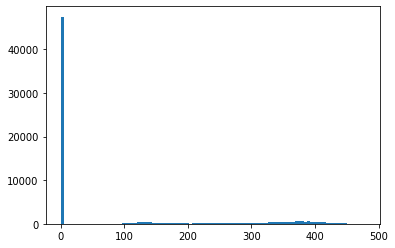

In [118]:
from file_cache import *

#file = glob(f'{root}/iNPH_CT_PROCESSED/{patient_id}/2/*_5.DCM')[0]
file = glob(f'{root}/iNPH_MRI_PROCESSED/{patient_id}/*Volume*.nii.gz')[0]

img = nib.load(file).get_fdata()
img = img[:, :, slice_sn]
# img = img - img.flatten().min()
# print(img.flatten().max(), img.flatten().min())
# img = img/img.flatten().max()
# print(img.flatten().max(), img.flatten().min())
# print(img.shape)


# img = (img - img.mean()) /img.std()
 
# print(img.max(), img.min())
print(img.shape)
#plt.imshow(img, cmap='gray')
plt.hist(img.flatten(),bins=100)
print(file)

In [108]:
# np.random.rand(3,4,5).max()

0.9965611056677797

(array([-1024, -1023, -1022, ...,  1986,  1989,  1996], dtype=int16), array([2, 6, 8, ..., 1, 1, 1]))
/share/data2/body/brain/NPH_PROCESSED/iNPH_MRI_PROCESSED/MR1312060094-Du RuTan/2 routinet1_se_tra_14.mha
=== (array([   0,    1,    2, ..., 1311, 1314, 1315], dtype=uint16), array([279293,   2141,   3673, ...,      1,      1,      1]))


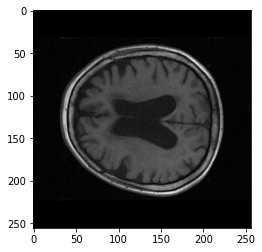

In [116]:
from medpy.io import load

print(np.unique(image_data, return_counts=True))
file = glob(f'{root}/iNPH_MRI_PROCESSED/{patient_id}/2*.mha')[0]
print(file)
image_data, image_header = load(file)
print('===',np.unique(image_data, return_counts=True))
plt.imshow(image_data[:, :, slice_sn], cmap='gray')
